# AFL-2 Data Mining

Nama : Farhizal Dwi Rinaldi

NIM : 0706022110041

### Import Library

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

### 1. Data Cleaning and Preparation

In [2]:
dataset = 'C:/Users/Fahrizal Dwi Rinaldi/Downloads/Semester 5/Data Mining/W8/customer_analysis.csv'
df = pd.read_csv(dataset, sep='\t')

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.isna().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

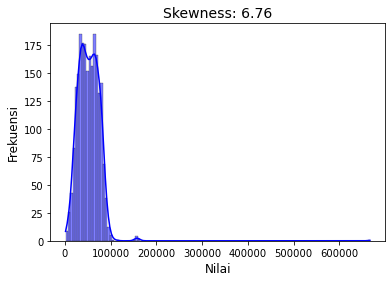

In [5]:
skewness = df['Income'].skew()

plt.figure(figsize=(6, 4))
sns.histplot(df['Income'], kde=True, color='blue')
plt.title(f'Skewness: {skewness:.2f}', fontsize=14)
plt.xlabel('Nilai', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

plt.show()

In [6]:
medianIncome = df['Income'].median()
df['Income'].fillna(medianIncome, inplace=True)

In [7]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [9]:
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Marital_Status'] = LabelEncoder().fit_transform(df['Marital_Status'])


### 2. Feature Engineering

In [11]:

# Feature Engineering
# 1. Age Extraction
tahunIni = pd.to_datetime('today').year
df['Age'] = tahunIni - df['Year_Birth']

# 2. Spending Power
spendingColumns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds'] 
df['Spent'] = df[spendingColumns].sum(axis=1)

# 3. Household Living Arrangement
df['Living_With'] = df['Marital_Status'].replace({
    'Absurd': 'Alone',    
    'Single': 'Alone',
    'Together': 'With Partner',
    'Married': 'With Couple',
    'Divorced': 'Alone',
    'Widow': 'Alone',
    'YOLO': 'Alone'
})

# 4. Family Dynamics
df['Children'] = df['Kidhome'] + df['Teenhome']

# 5. Family Unity
df['Family_Size'] = df['Children'] + 2 

# 6. Parental Status
df['Is_Parent'] = (df['Children'] > 0).astype(int)

# 7. Educational Evolution
df['Education'] = df['Education'].replace({
    'Basic': 'Low',
    '2n Cycle': 'Mid',
    'Graduation': 'Low',
    'Master': 'Mid',
    'PhD': 'High'
})

# 8. Farewell to Redundancy
redundant_columns = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Marital_Status', 'Kidhome', 'Teenhome']
df.drop(columns=redundant_columns, inplace=True)



In [12]:
df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,2,58138.0,58,635,88,546,172,88,88,3,...,0,0,0,1,66,1617,4,0,2,0
1,2,46344.0,38,11,1,6,2,1,6,2,...,0,0,0,0,69,27,4,2,4,1
2,2,71613.0,26,426,49,127,111,21,42,1,...,0,0,0,0,58,776,5,0,2,0
3,2,26646.0,26,11,4,20,10,3,5,2,...,0,0,0,0,39,53,5,1,3,1
4,4,58293.0,94,173,43,118,46,27,15,5,...,0,0,0,0,42,422,3,1,3,1


### 3. Data Preparation

In [13]:
numericalColums = df.select_dtypes(include=['number']).columns.tolist()
df[numericalColums] = StandardScaler().fit_transform(df[numericalColums])
df.head()

,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.350141,0.235696,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,0.843207,0.349414,...,-0.262111,-0.11651,-0.097282,2.388846,0.985345,1.679417,0.251004,-1.264505,-1.264505,-1.584605
1,-0.350141,-0.235454,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,-0.729006,-0.168236,...,-0.262111,-0.11651,-0.097282,-0.418612,1.235733,-0.961275,0.251004,1.396361,1.396361,0.631072
2,-0.350141,0.773999,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,-0.038766,-0.685887,...,-0.262111,-0.11651,-0.097282,-0.418612,0.317643,0.282673,1.180340,-1.264505,-1.264505,-1.584605
3,-0.350141,-1.022355,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,-0.748179,-0.168236,...,-0.262111,-0.11651,-0.097282,-0.418612,-1.268149,-0.918094,1.180340,0.065928,0.065928,0.631072
4,1.428354,0.241888,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,-0.556446,1.384715,...,-0.262111,-0.11651,-0.097282,-0.418612,-1.017761,-0.305254,-0.678332,0.065928,0.065928,0.631072


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

pcaDf = pd.DataFrame(data=pca_result, columns=[f"PCA{i+1}" for i in range(pca_result.shape[1])])

### 4. Clustering

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


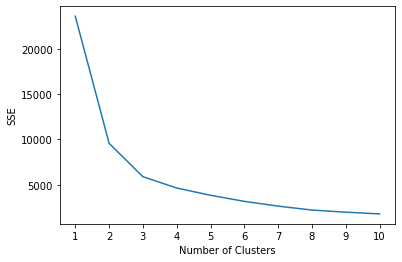

The best k for your model is 3


In [15]:
from sklearn.cluster import KMeans

kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42,}

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(pcaDf)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

from kneed import KneeLocator

findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('The best k for your model is', findknee.elbow)

In [16]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3  
model = AgglomerativeClustering(n_clusters=n_clusters)

cluster_labels = model.fit_predict(pcaDf)

pcaDf['Cluster'] = cluster_labels

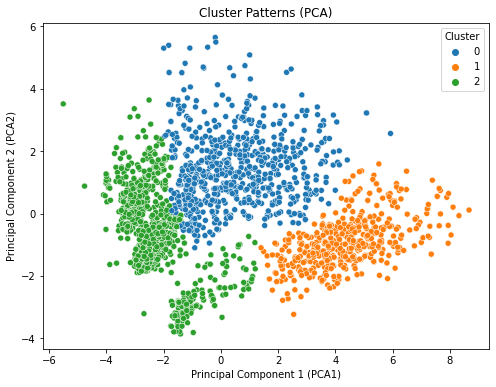

In [17]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pcaDf['PCA1'], y=pcaDf['PCA2'], hue=cluster_labels, palette='tab10')
plt.title('Cluster Patterns (PCA)')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend(title='Cluster')
plt.show()

### 5. Visualization

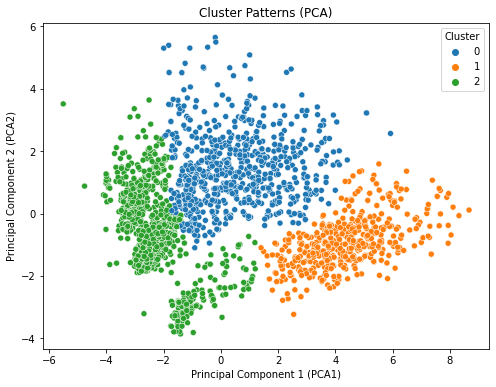

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pcaDf['PCA1'], y=pcaDf['PCA2'], hue=cluster_labels, palette='tab10')
plt.title('Cluster Patterns (PCA)')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend(title='Cluster')
plt.show()

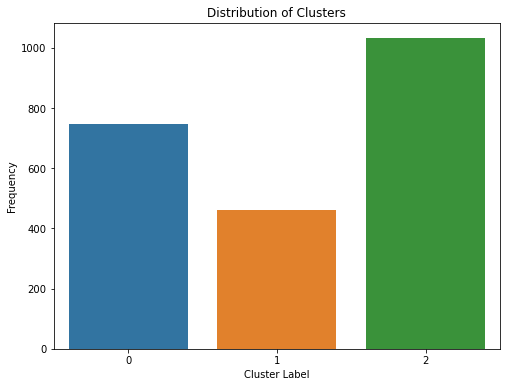

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=pcaDf, palette='tab10')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.show()

d:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


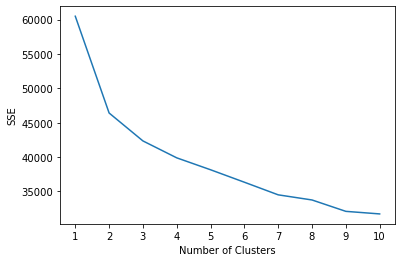

The best k for your model is 3


In [20]:
from sklearn.cluster import KMeans

kmeans_params = { "init": "random", "n_init": 10,"max_iter": 300,
                 "random_state": 42,}

SSE = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_params)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

plt.plot(range(1, 11), SSE)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

from kneed import KneeLocator

findknee = KneeLocator(range(1, 11), SSE, curve="convex", direction="decreasing")
print('The best k for your model is', findknee.elbow)

In [21]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3  
model = AgglomerativeClustering(n_clusters=n_clusters)

cluster_labels = model.fit_predict(df)

pcaDf['Cluster'] = cluster_labels

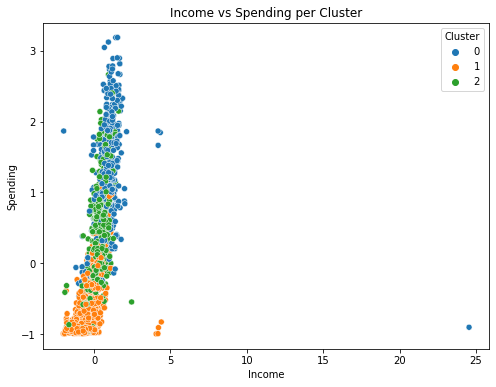

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Spent', hue=cluster_labels, data=df, palette='tab10')
plt.title('Income vs Spending per Cluster')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend(title='Cluster')
plt.show()